In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [ ]:
pd.read_csv("magic04.data")

,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.011,-8.2027,40.092,81.8828,g
0,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
1,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
2,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
3,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
4,51.6240,21.1502,2.9085,0.2420,0.1340,50.8761,43.1887,9.8145,3.6130,238.0980,g
...,...,...,...,...,...,...,...,...,...,...,...
19014,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19015,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19016,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19017,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


In [ ]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df = pd.read_csv("magic04.data", names=cols)
df.head()


,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [ ]:
df["class"] = (df["class"] == 'g').astype(int)

In [ ]:
train,valid,test = np.split(df.sample(frac =1),[int( 0.6*len(df)),int( 0.8*len(df))])

In [ ]:
def scale_dataset(dataframe, oversample = False):
  x = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values
  scaler = StandardScaler()
  x = scaler.fit_transform(x)
  if oversample:
    ros = RandomOverSampler()
    x, y = ros.fit_resample(x, y)

  data = np.hstack((x,np.reshape(y,(-1,1))))
  return data,y,x

In [ ]:
train, y_train, x_train = scale_dataset(train, oversample = True)
valid, y_valid, x_valid = scale_dataset(valid, oversample = True)
test, y_test, x_test = scale_dataset(test, oversample = True)

In [ ]:
len(y_train)

14806

In [ ]:
sum(y_train == 0)

7443

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [ ]:
knn_model =  KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
y_predict = knn_model.predict(x_test)

In [ ]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.84      0.74      0.79      2497
           1       0.77      0.86      0.81      2497

    accuracy                           0.80      4994
   macro avg       0.81      0.80      0.80      4994
weighted avg       0.81      0.80      0.80      4994



In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb_model = GaussianNB()
nb_model = nb_model.fit(x_train,y_train)


In [ ]:
y_pred = nb_model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.40      0.53      2471
           1       0.60      0.90      0.72      2471

    accuracy                           0.65      4942
   macro avg       0.70      0.65      0.63      4942
weighted avg       0.70      0.65      0.63      4942



In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(x_train,y_train)

In [ ]:
y_pred = lg_model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.74      0.78      2497
           1       0.76      0.83      0.79      2497

    accuracy                           0.79      4994
   macro avg       0.79      0.79      0.78      4994
weighted avg       0.79      0.79      0.78      4994



In [ ]:
from sklearn.svm import SVC

In [ ]:
sv_model = SVC()
sv_model = sv_model.fit(x_train,y_train)

In [ ]:
y_pred = lg_model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.74      0.78      2497
           1       0.76      0.83      0.79      2497

    accuracy                           0.79      4994
   macro avg       0.79      0.79      0.78      4994
weighted avg       0.79      0.79      0.78      4994



In [ ]:
import tensorflow as tf

In [ ]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()

In [ ]:
def train_model(x_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes,activation = 'relu',input_shape = (10,)),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes,activation = 'relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1, activation = 'sigmoid')
  ])
  nn_model.compile(optimizer = tf.keras.optimizers.Adam(lr),loss = 'binary_crossentropy',
                   metrics = ['accuracy'])
  history = nn_model.fit(
    x_train,y_train,epochs = epochs,batch_size=batch_size,validation_split = 0.2,verbose = 0
  )
  return nn_model, history

32 nodes, dropout 0, lr 0.01, batch size 64


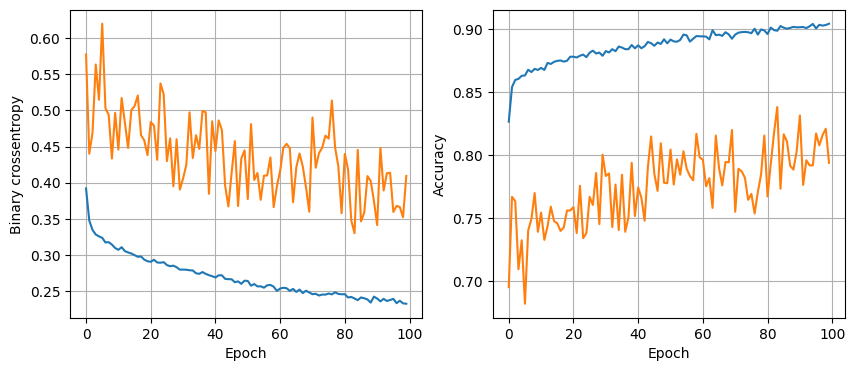

464/464 [==============================] - 1s 1ms/step - loss: 0.2650 - accuracy: 0.8823
32 nodes, dropout 0, lr 0.01, batch size 128


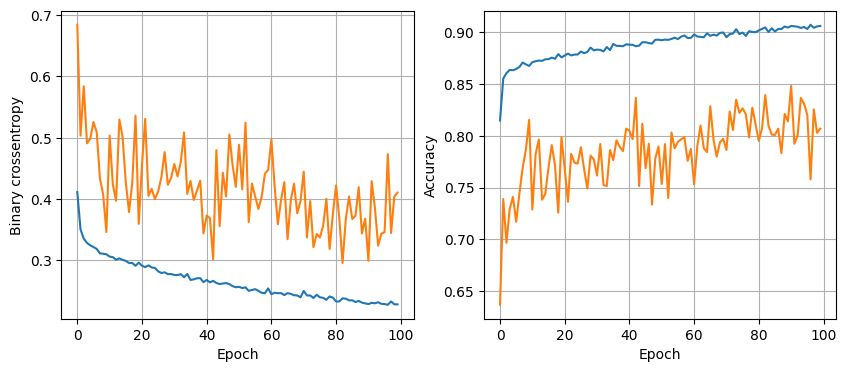

464/464 [==============================] - 1s 1ms/step - loss: 0.2597 - accuracy: 0.8871
32 nodes, dropout 0, lr 0.005, batch size 64


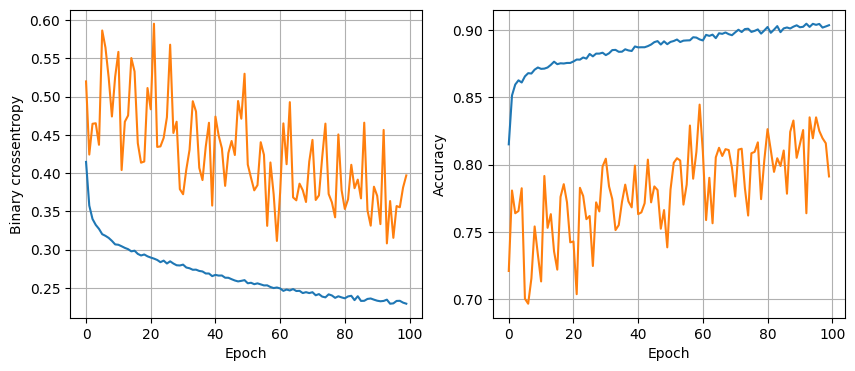

464/464 [==============================] - 1s 1ms/step - loss: 0.2570 - accuracy: 0.8815
32 nodes, dropout 0, lr 0.005, batch size 128


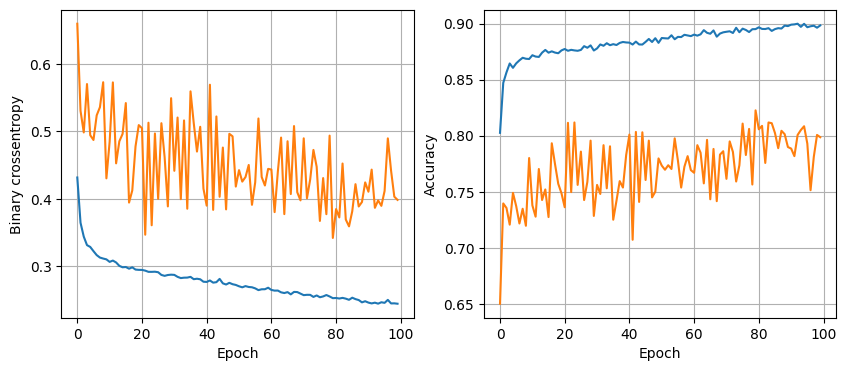

464/464 [==============================] - 1s 1ms/step - loss: 0.2701 - accuracy: 0.8808
32 nodes, dropout 0, lr 0.001, batch size 64


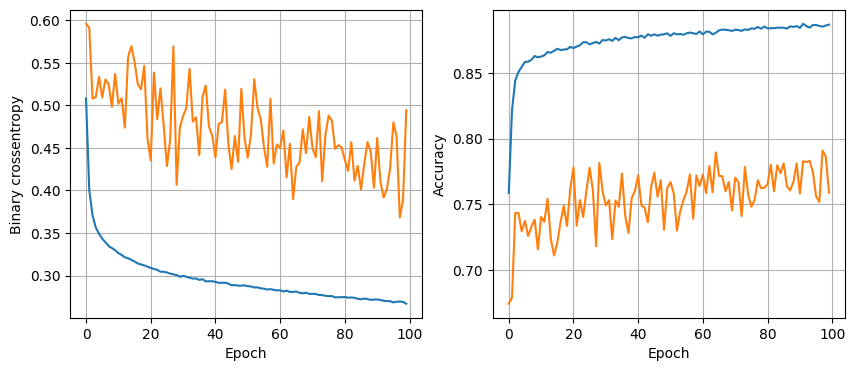

464/464 [==============================] - 1s 1ms/step - loss: 0.3119 - accuracy: 0.8622
32 nodes, dropout 0, lr 0.001, batch size 128


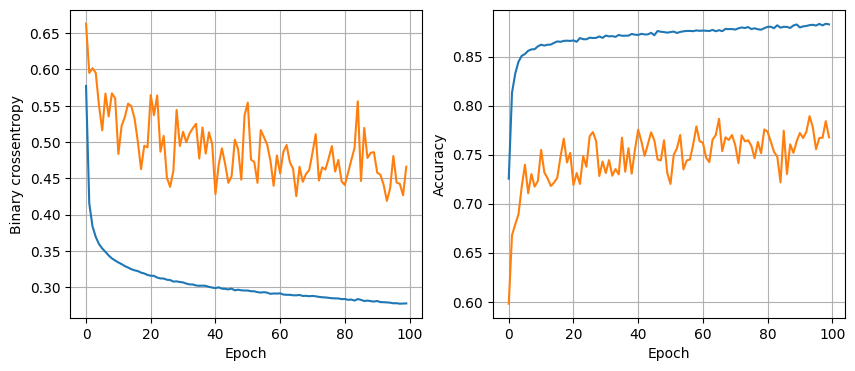

464/464 [==============================] - 1s 2ms/step - loss: 0.3127 - accuracy: 0.8603
32 nodes, dropout 0.2, lr 0.01, batch size 64


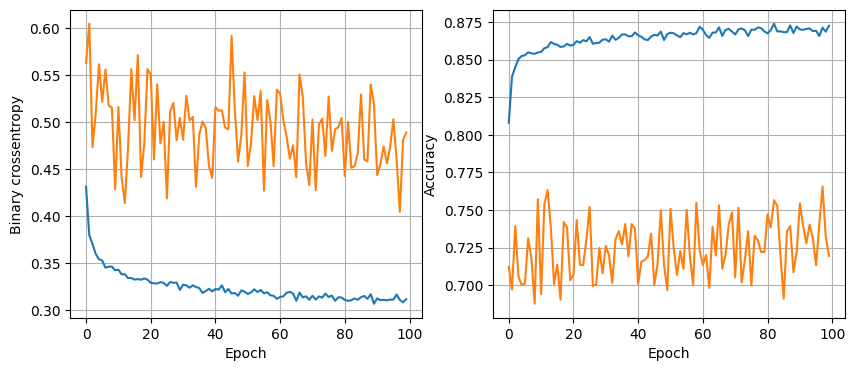

464/464 [==============================] - 1s 2ms/step - loss: 0.3288 - accuracy: 0.8463
32 nodes, dropout 0.2, lr 0.01, batch size 128


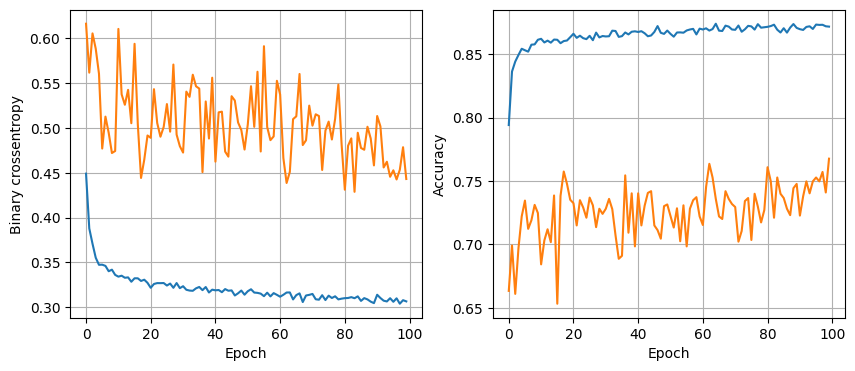

464/464 [==============================] - 1s 2ms/step - loss: 0.3088 - accuracy: 0.8632
32 nodes, dropout 0.2, lr 0.005, batch size 64


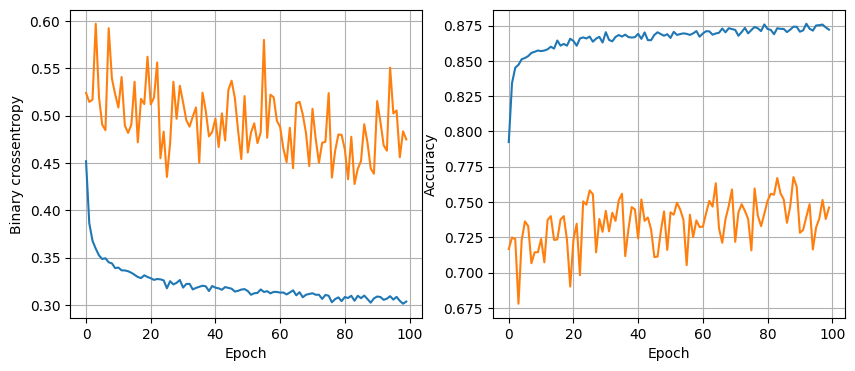

464/464 [==============================] - 1s 2ms/step - loss: 0.3126 - accuracy: 0.8599
32 nodes, dropout 0.2, lr 0.005, batch size 128


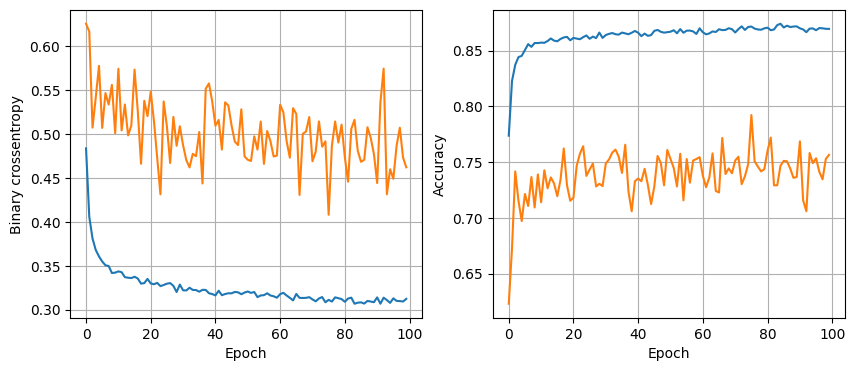

464/464 [==============================] - 1s 2ms/step - loss: 0.3180 - accuracy: 0.8571
32 nodes, dropout 0.2, lr 0.001, batch size 64


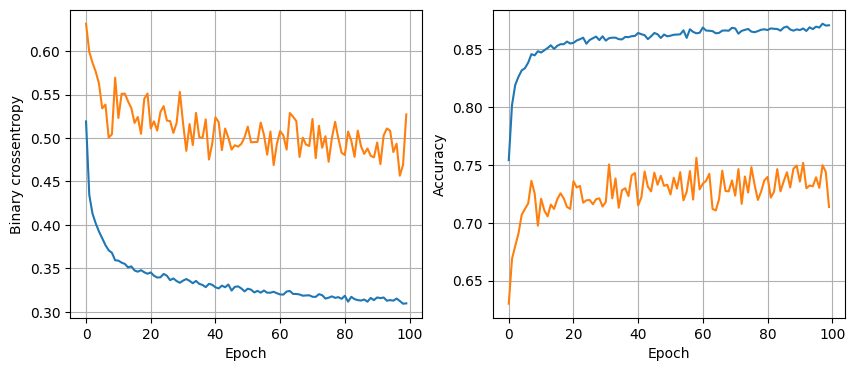

464/464 [==============================] - 1s 2ms/step - loss: 0.3390 - accuracy: 0.8425
32 nodes, dropout 0.2, lr 0.001, batch size 128


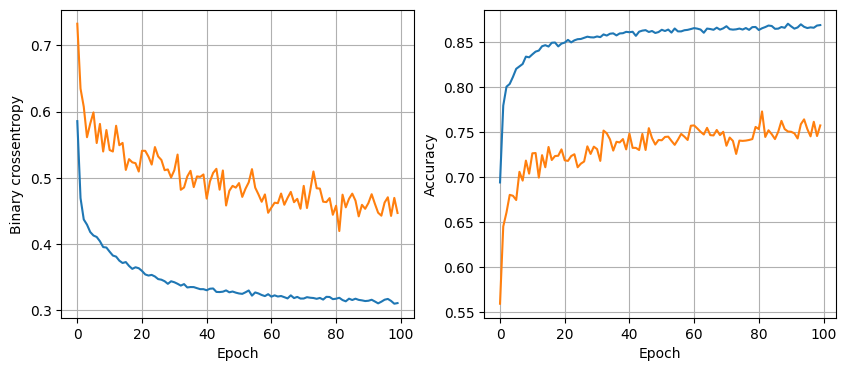

464/464 [==============================] - 1s 2ms/step - loss: 0.3209 - accuracy: 0.8535
64 nodes, dropout 0, lr 0.01, batch size 64


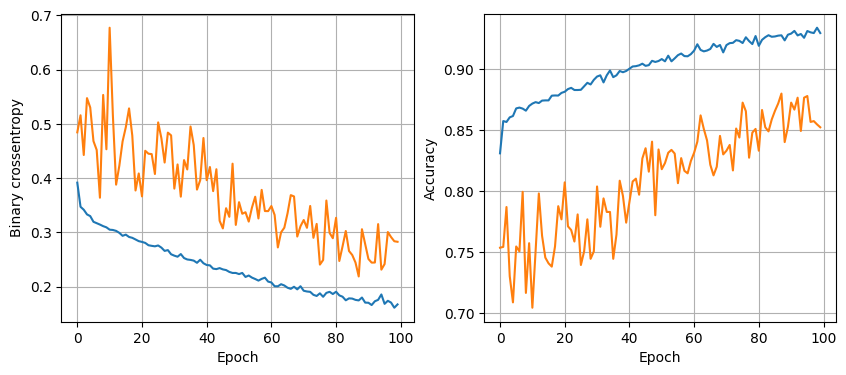

464/464 [==============================] - 1s 2ms/step - loss: 0.1757 - accuracy: 0.9219
64 nodes, dropout 0, lr 0.01, batch size 128


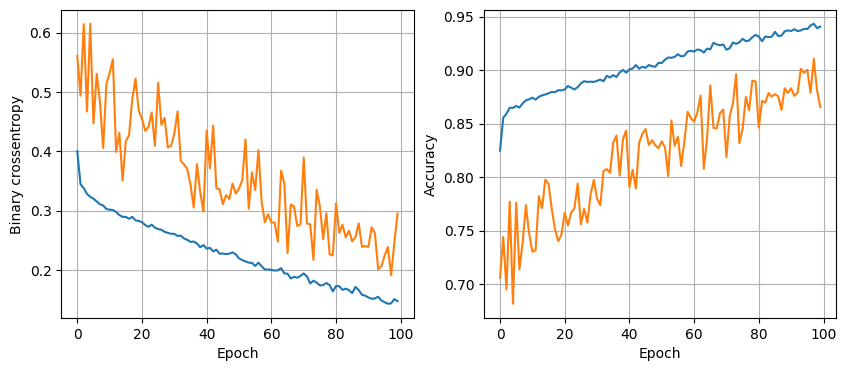

464/464 [==============================] - 1s 2ms/step - loss: 0.1841 - accuracy: 0.9266
64 nodes, dropout 0, lr 0.005, batch size 64


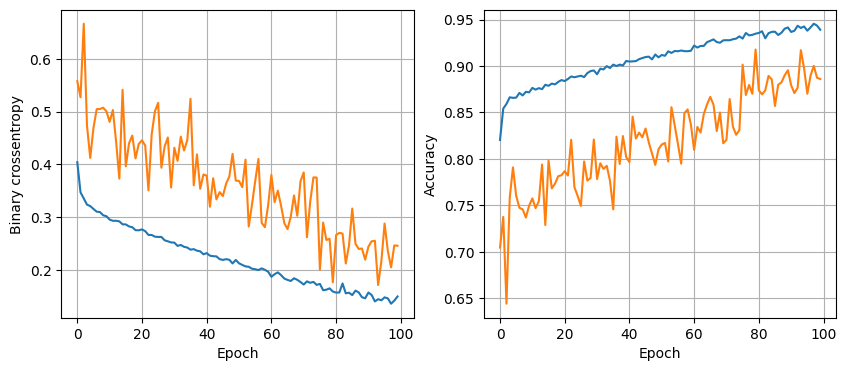

464/464 [==============================] - 1s 2ms/step - loss: 0.1597 - accuracy: 0.9326
64 nodes, dropout 0, lr 0.005, batch size 128


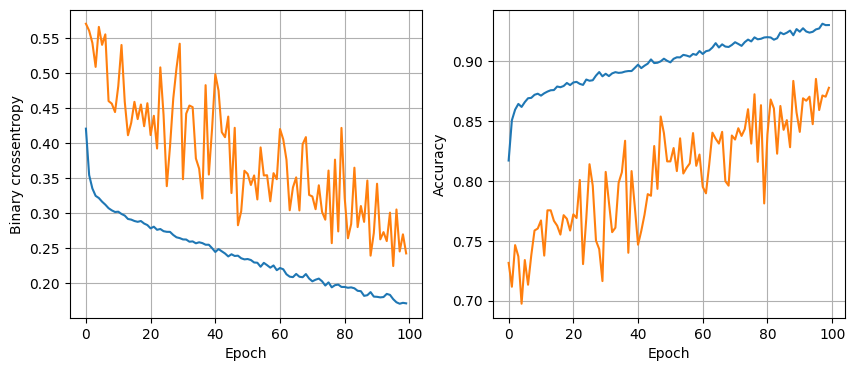

464/464 [==============================] - 1s 2ms/step - loss: 0.1811 - accuracy: 0.9210
64 nodes, dropout 0, lr 0.001, batch size 64


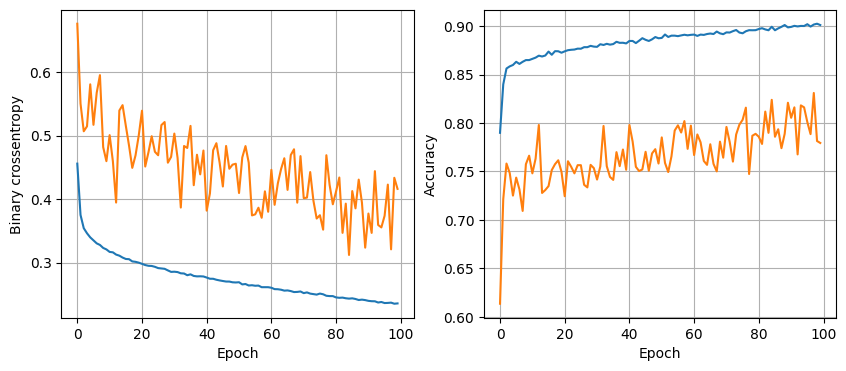

464/464 [==============================] - 1s 2ms/step - loss: 0.2660 - accuracy: 0.8784
64 nodes, dropout 0, lr 0.001, batch size 128


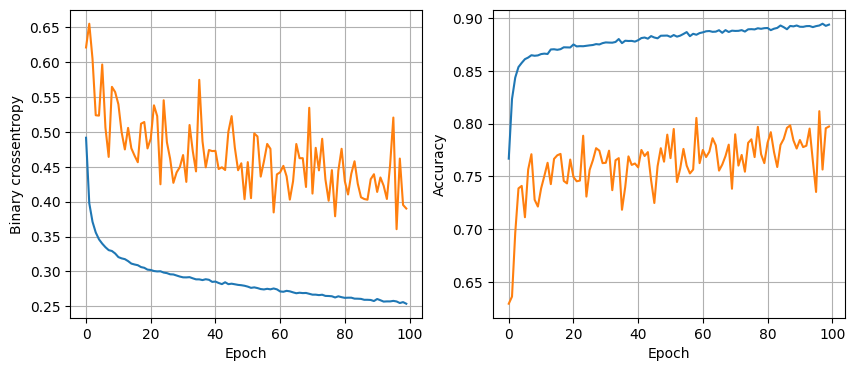

464/464 [==============================] - 1s 2ms/step - loss: 0.2764 - accuracy: 0.8760
64 nodes, dropout 0.2, lr 0.01, batch size 64


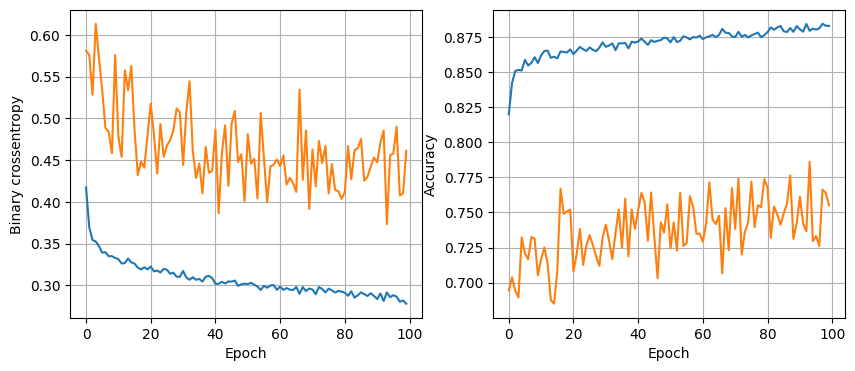

464/464 [==============================] - 1s 2ms/step - loss: 0.2883 - accuracy: 0.8672
64 nodes, dropout 0.2, lr 0.01, batch size 128


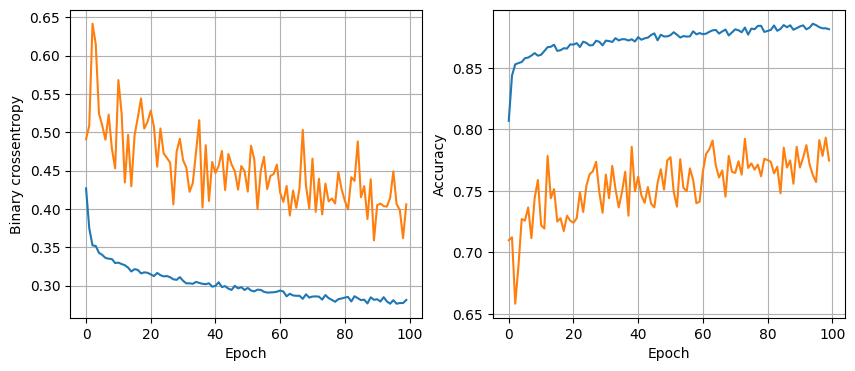

464/464 [==============================] - 1s 2ms/step - loss: 0.2730 - accuracy: 0.8761
64 nodes, dropout 0.2, lr 0.005, batch size 64


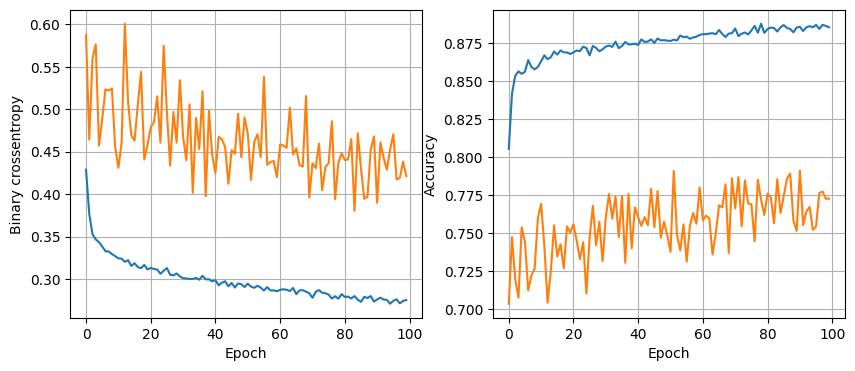

464/464 [==============================] - 1s 2ms/step - loss: 0.2763 - accuracy: 0.8751
64 nodes, dropout 0.2, lr 0.005, batch size 128


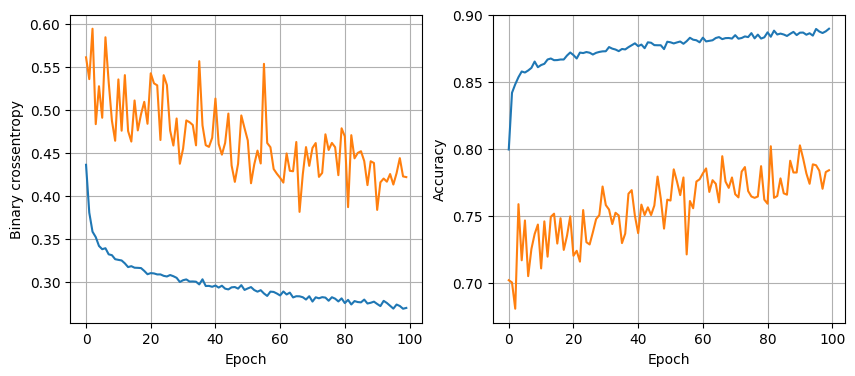

464/464 [==============================] - 1s 2ms/step - loss: 0.2766 - accuracy: 0.8796
64 nodes, dropout 0.2, lr 0.001, batch size 64


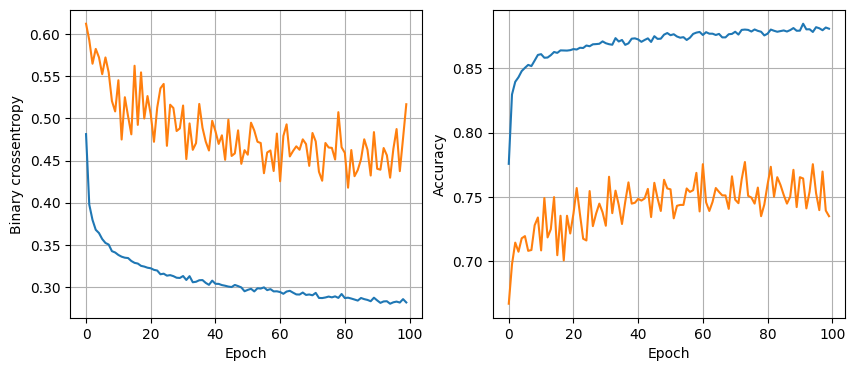

464/464 [==============================] - 1s 2ms/step - loss: 0.3135 - accuracy: 0.8571
64 nodes, dropout 0.2, lr 0.001, batch size 128


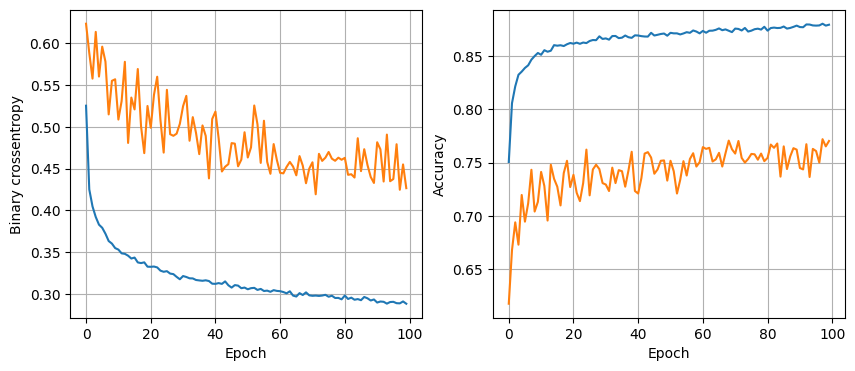

464/464 [==============================] - 1s 2ms/step - loss: 0.2987 - accuracy: 0.8651


In [ ]:
least_val_loss = float('inf')
least_loss_model = None
epochs = 100
for num_nodes in [32,64]:
  for dropout_prob in [0,0.2]:
    for lr in [0.01,0.005,0.001]:
      for batch_size in [64,128]:
         print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
         model,history = train_model(x_train,y_train,num_nodes,dropout_prob,lr,batch_size,epochs)
         plot_history(history)
         val_loss = model.evaluate(x_train,y_train)[0]
         if val_loss<least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model

In [ ]:
y_pred = least_loss_model.predict(x_test)
y_pred = (y_pred>0.5).astype(int).reshape(-1,)
y_pred

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.79      0.83      2497
           1       0.81      0.90      0.85      2497

    accuracy                           0.84      4994
   macro avg       0.85      0.84      0.84      4994
weighted avg       0.85      0.84      0.84      4994



In [ ]:
model1,history1 = train_model(x_train,y_train,1024,0,0.001,128,100)

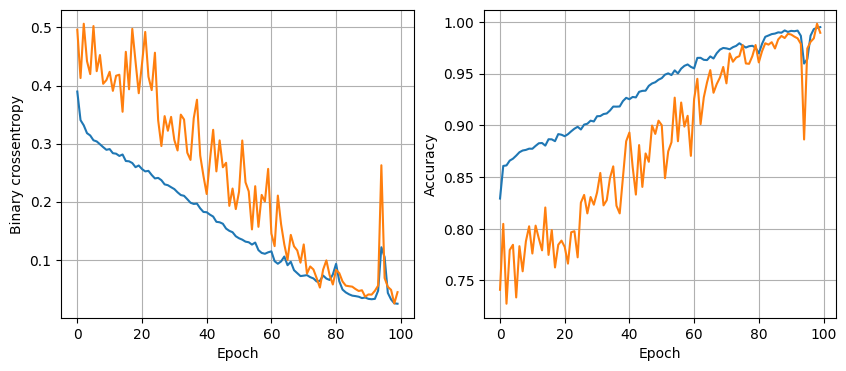

In [ ]:
plot_history(history1)

In [ ]:
y_pred1 = model1.predict(x_test)
y_pred1 = (y_pred1>0.5).astype(int).reshape(-1,)
y_pred1

157/157 [==============================] - 1s 4ms/step


array([1, 0, 0, ..., 0, 1, 0])

In [ ]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.91      0.74      0.82      2498
           1       0.78      0.93      0.85      2498

    accuracy                           0.83      4996
   macro avg       0.84      0.83      0.83      4996
weighted avg       0.84      0.83      0.83      4996

